# Seaborn可视化

In [1]:
import numpy as np
import pandas as pd

%pylab inline
import seaborn as sns
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


#### 先用pandas读进来一份数据

In [2]:
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
df['maker'] = df.car_name.map(lambda x: x.split()[0])
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


## 一般绘图：factorplot 和 FacetGrid

### 根据2个维度变量绘图

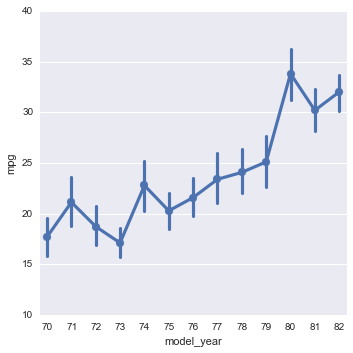

In [232]:
# 画出model_year和mpg的关系图
sns.factorplot(data=df, x="model_year", y="mpg")

### 可以按照第3个维度绘制不同的关系图

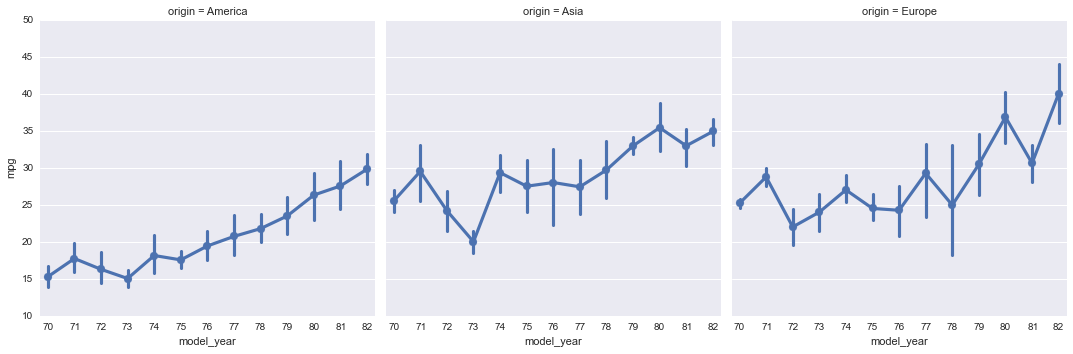

In [233]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin")

### 可以从折线图切成柱状图

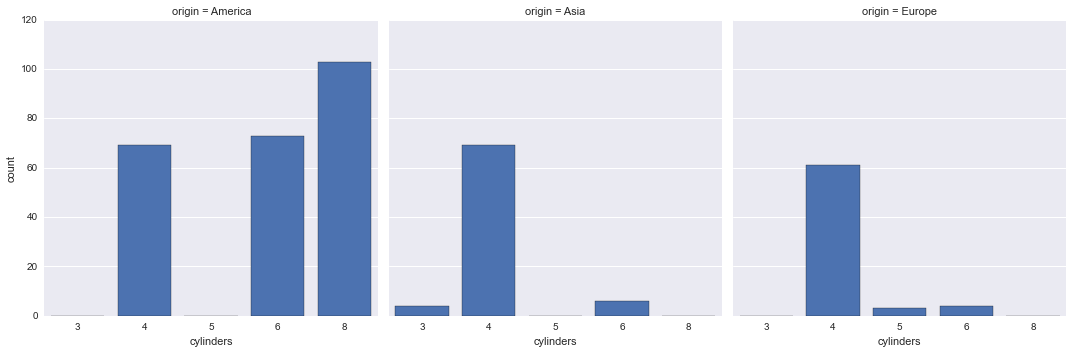

In [234]:
sns.factorplot("cylinders", data=df, col="origin", kind='bar')

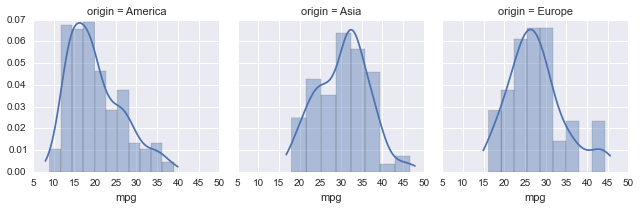

In [235]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.distplot, "mpg")

### 散点图

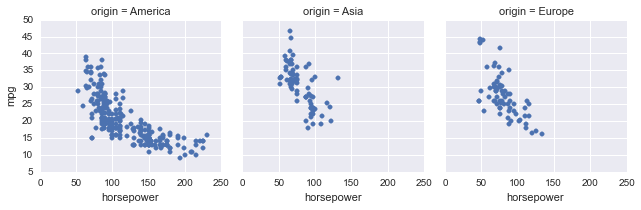

In [236]:
g = sns.FacetGrid(df, col="origin")
g.map(plt.scatter, "horsepower", "mpg")

### 绘图的同时还做回归

(0, 60)

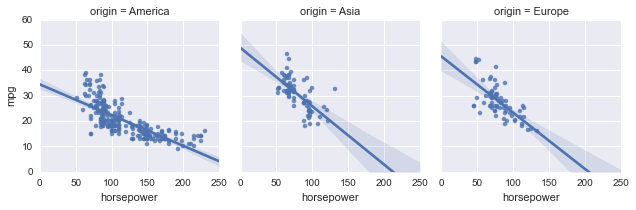

In [237]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.regplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

### kde等高线图

(0, 60)

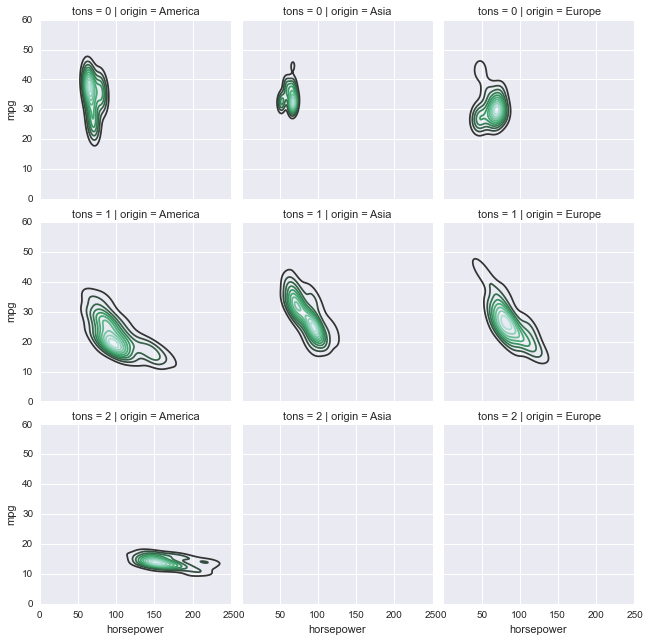

In [238]:
df['tons'] = (df.weight/2000).astype(int)
g = sns.FacetGrid(df, col="origin", row="tons")
g.map(sns.kdeplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

### 按照2个维度展开画图

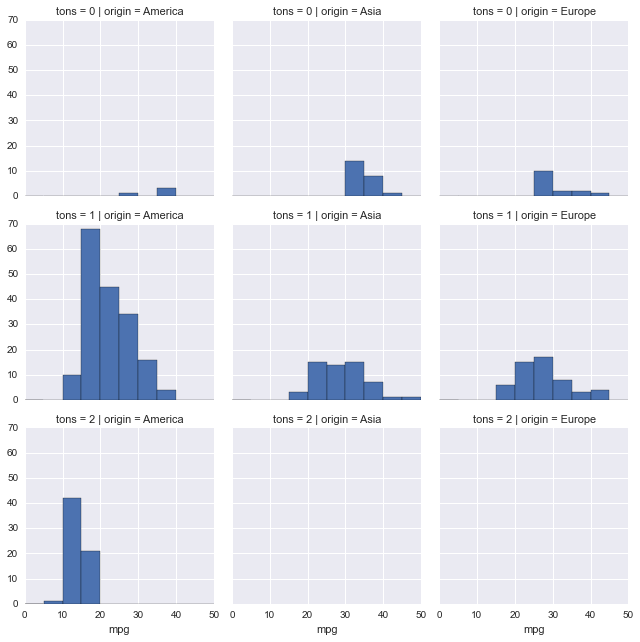

In [239]:
g = sns.FacetGrid(df, col="origin", row="tons")
g.map(plt.hist, "mpg", bins=np.linspace(0, 50, 11))

## pairplot and PairGrid

### 多个维度两两组合绘图

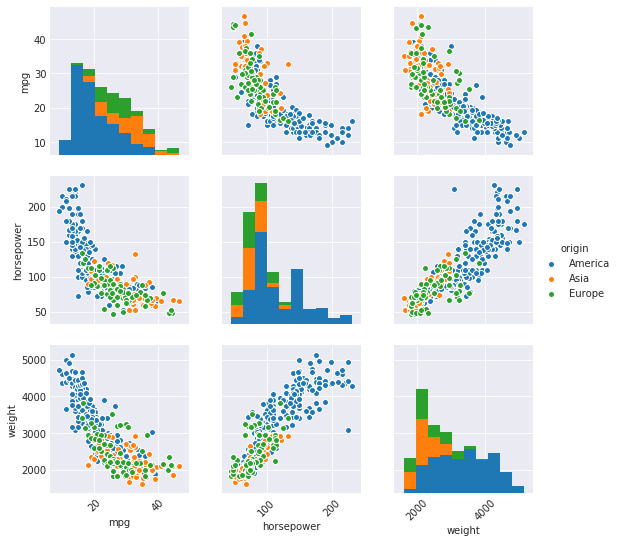

In [3]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

### 组合绘图的时候顺便回归一下

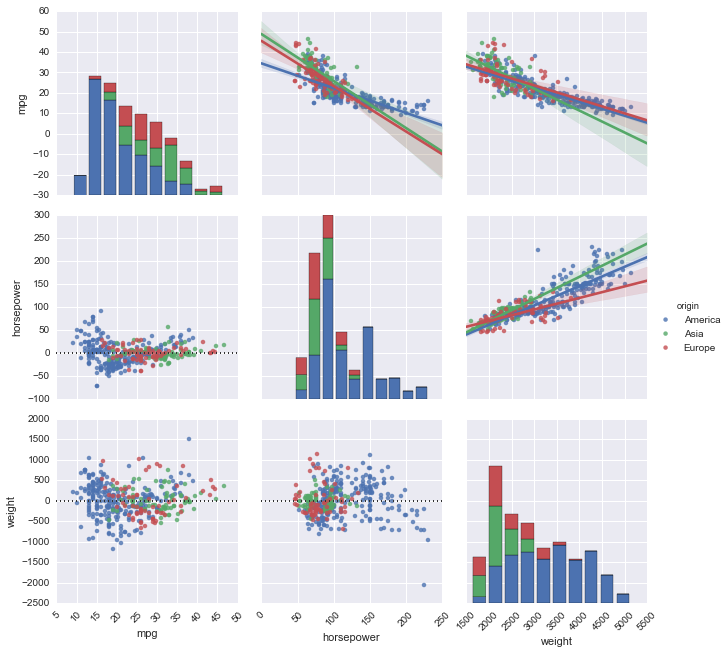

In [241]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(plt.hist)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()
g.set(alpha=0.5)

## jointplot and JointGrid

### 联合绘图(kde等高)

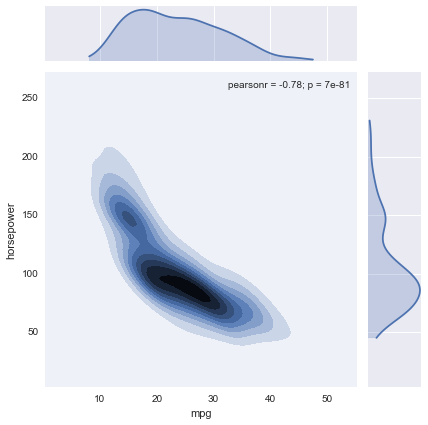

In [242]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde')

### 联合绘图(加回归)

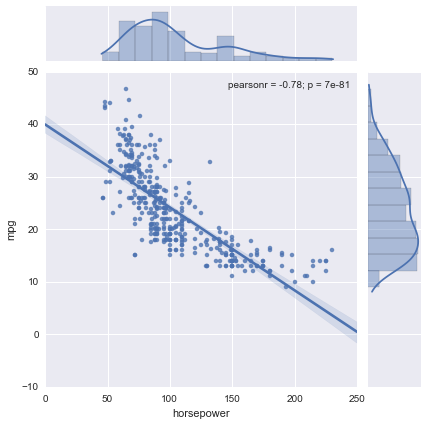

In [243]:
sns.jointplot("horsepower", "mpg", data=df, kind="reg")

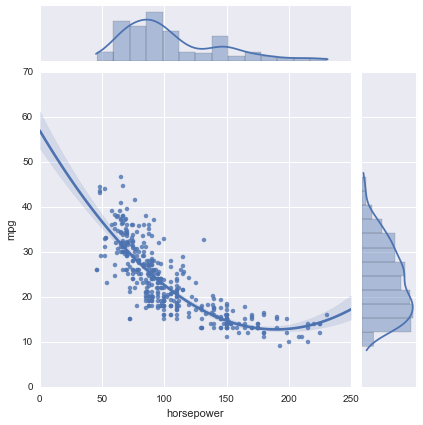

In [244]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.distplot)